In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2

In [2]:
# db = CaseDB(
#     case_dir = r"/ssd_scratch/hcases",
#     grid_dir = r"/ssd_scratch/hcases"
#     )

db = CaseDB(
    case_dir = r"/users/mjk557/scratch/cases/st40",
    grid_dir = r"/users/mjk557/scratch/cases/"
    )

old_case = "c3a_4.625e5_nobarrier"
new_case = "c3a-barrier"

In [3]:


# choice = "b4b-40eV_1e17_fixndiff"
# choice = "b5b-40eV_1e18_fixndiff"
# choice = "b6b-40eV_1e19_fixndiff"
# choice = "c1a-40eV_1e17_newbout"
# choice = "c1b-40eV_1e17_precon"
# choice = "c2a-precon"
choice = "b1-jan23base"
# choice = "c1c-40eV_1e17_lofloor"
# choice = "c2ac-copy"
# choice = "c2ad-copy"
# choice = "b3a-t3-small_temp_steps"

case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a4-lores.nc"],
                    double_load = True)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.607E+00 [m3]
--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


In [5]:
import shutil

old_path = r"/users/mjk557/scratch/cases/g3a5-fatter.nc"
new_path = r"/users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc"

shutil.copyfile(
    old_path,
    new_path,
)

mesh = Mesh(new_path)

D_e = Field("D_e", mesh)
D_e.data[mesh.slices("all")] = 1
D_e.data[mesh.slices("core")] = 0.3

D_i = Field("D_d+", mesh)
D_i.data[mesh.slices("all")] = 1
D_i.data[mesh.slices("core")] = 0.3

Chi_e = Field("chi_e", mesh)
Chi_e.data[mesh.slices("all")] = 3
Chi_e.data[mesh.slices("core")] = 0.45

Chi_i = Field("chi_d+", mesh)
Chi_i.data[mesh.slices("all")] = 3
Chi_i.data[mesh.slices("core")] = 0.45
# D.data[mesh.slices("outer_core")] = 0.5

# Chi_i.plot()

mesh.write_field(D_e, dtype = "Field2D")
mesh.write_field(D_i, dtype = "Field2D")
mesh.write_field(Chi_e, dtype = "Field2D")
mesh.write_field(Chi_i, dtype = "Field2D")

mesh.close()
del mesh

>>> Field D_e already exists in /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc, it will be overwritten
-> Wrote field D_e to /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc
>>> Field D_d+ already exists in /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc, it will be overwritten
-> Wrote field D_d+ to /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc
>>> Field chi_e already exists in /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc, it will be overwritten
-> Wrote field chi_e to /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc
>>> Field chi_d+ already exists in /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc, it will be overwritten
-> Wrote field chi_d+ to /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc
Mesh file /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc closed


Mesh file /users/mjk557/scratch/cases/g3a5f1-D0.3-Chi0.45.nc closed


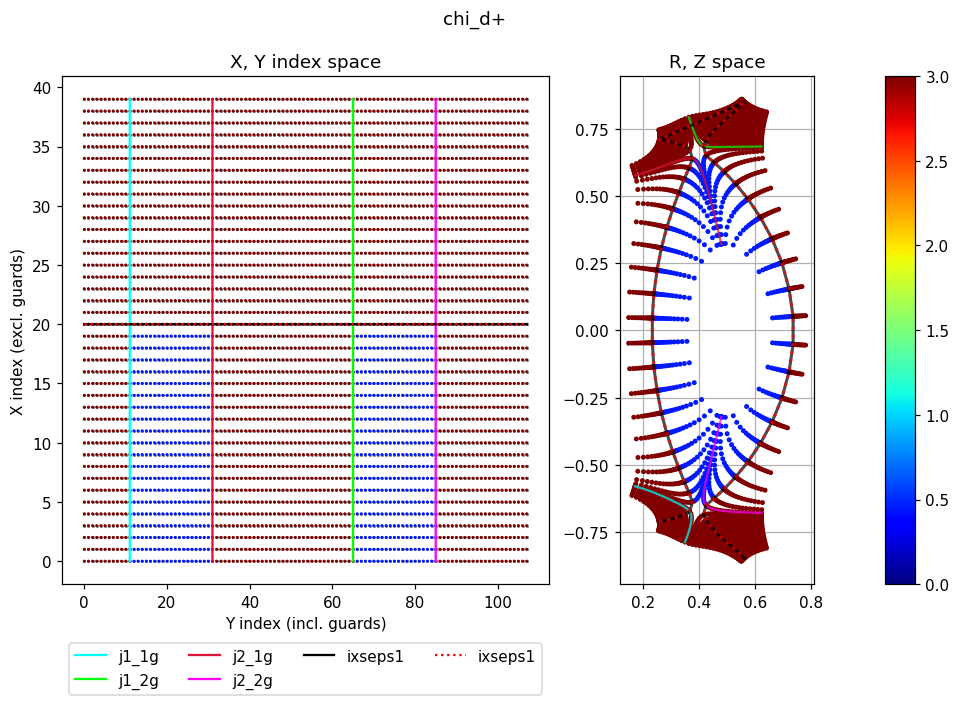

In [6]:
mesh = Mesh(new_path)
mesh.plot_field("chi_d+")
mesh.close()
del mesh
# set(list(mesh.mesh["chi_d+"].flatten()))

In [17]:
# shutil.copytree(
#     r"/ssd_scratch/hcases/b1-jan23base",
#     r"/ssd_scratch/hcases/b0b-try-add-vars",
#     dirs_exist_ok=True
# )

for var in ["Chi_d+", "Chi_e", "D_d+", "D_e", "nu_d+", "nu_e"]:
# for var in ["Chi_d+"]:
    addvar(f"anomalous_{var}", 0, db.casepaths[new_case])

Number of restart files: 40
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.13.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.30.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.27.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.14.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.1.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.37.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.8.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.19.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.16.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.11.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.18.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.0.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.22.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.15.nc
/users/mjk557/scratch/cases/st40/c3a-barrier/BOUT.restart.36.nc
/users/mjk557/s

## Verfify the new field exists in datafile

In [14]:
with DataFile(os.path.join(db.casepaths[new_case], "BOUT.dmp.0.nc")) as df:
    print(df.keys())

['BOUT_VERSION', 'Bnorm', 'Bxy', 'Cs0', 'Ed+_iz', 'Ed+_rec', 'Edd+_cx', 'Fd+_iz', 'Fd+_rec', 'Fdd+_cx', 'G1', 'G2', 'G3', 'HERMES_REVISION', 'J', 'MXG', 'MXSUB', 'MYG', 'MYPE', 'MYSUB', 'MZ', 'MZG', 'MZSUB', 'NVd', 'NVd+', 'NXPE', 'NYPE', 'NZPE', 'Nd', 'Nd+', 'Ne', 'Nnorm', 'Omega_ci', 'PE_XIND', 'PE_YIND', 'Pd', 'Pd+', 'Pd+_src', 'Pe', 'Pe_src', 'Rd+_ex', 'Rd+_rec', 'SNVd', 'SNVd+', 'SNd', 'SNd+', 'SPd', 'SPd+', 'SPe', 'Sd+_iz', 'Sd+_rec', 'Sd+_src', 'Td', 'Td+', 'Te', 'Tnorm', 'Vd+', 'Ve', 'ZMAX', 'ZMIN', 'cvode_last_order', 'cvode_last_step', 'cvode_nfevals', 'cvode_nliters', 'cvode_nniters', 'cvode_nonlin_fails', 'cvode_npevals', 'cvode_nsteps', 'cvode_num_fails', 'cvode_stab_lims', 'ddt(NVd)', 'ddt(NVd+)', 'ddt(Nd)', 'ddt(Nd+)', 'ddt(Pd)', 'ddt(Pd+)', 'ddt(Pe)', 'dx', 'dy', 'dz', 'g11', 'g12', 'g13', 'g22', 'g23', 'g33', 'g_11', 'g_12', 'g_13', 'g_22', 'g_23', 'g_33', 'has_fftw', 'has_gettext', 'has_lapack', 'has_netcdf', 'has_petsc', 'has_pretty_function', 'has_pvode', 'has_score

## Verify the new field has the correct shape

In [16]:
for casename in [old_case, new_case]:
    with DataFile(os.path.join(db.casepaths[casename], "BOUT.restart.0.nc")) as df:
        
        print(f'{casename}:')
        # print(df.keys())
        print(f'Nd+ shape: {df["Nd+"].shape}')
        print(f'Pd+ shape: {df["Pd+"].shape}')
        if "anomalous_Chi_d+" in df.keys():
            print(f'Chi_d+ shape: {df["anomalous_Chi_d+"].shape}')
            # print(df["anomalous_Chi_d+"])
        print("")
        


c3a_4.625e5_nobarrier:
Nd+ shape: (22, 9, 1)
Pd+ shape: (22, 9, 1)

c3a-barrier:
Nd+ shape: (22, 9, 1)
Pd+ shape: (22, 9, 1)
Chi_d+ shape: (22, 9, 1)



## Plot results

In [12]:
caseng = Load.case_2D(db.casepaths[new_case], gridfilepath = db.gridpaths["g3a4-lores.nc"], double_load = False, keep_boundaries = False)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.032E+00 [m3]


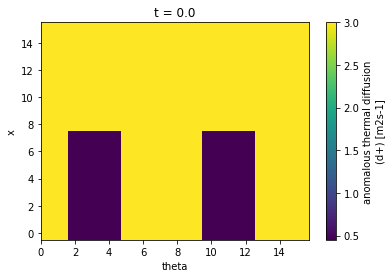

In [16]:
caseng.ds["anomalous_Chi_d+"].isel(t=0).plot()

In [18]:
caseng.ds["anomalous_Chi_d+"].values

array([[[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.]],

       ...,

       [[3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        ...,
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3., 3.],
        [3., 3., 3., ..., 3., 3.

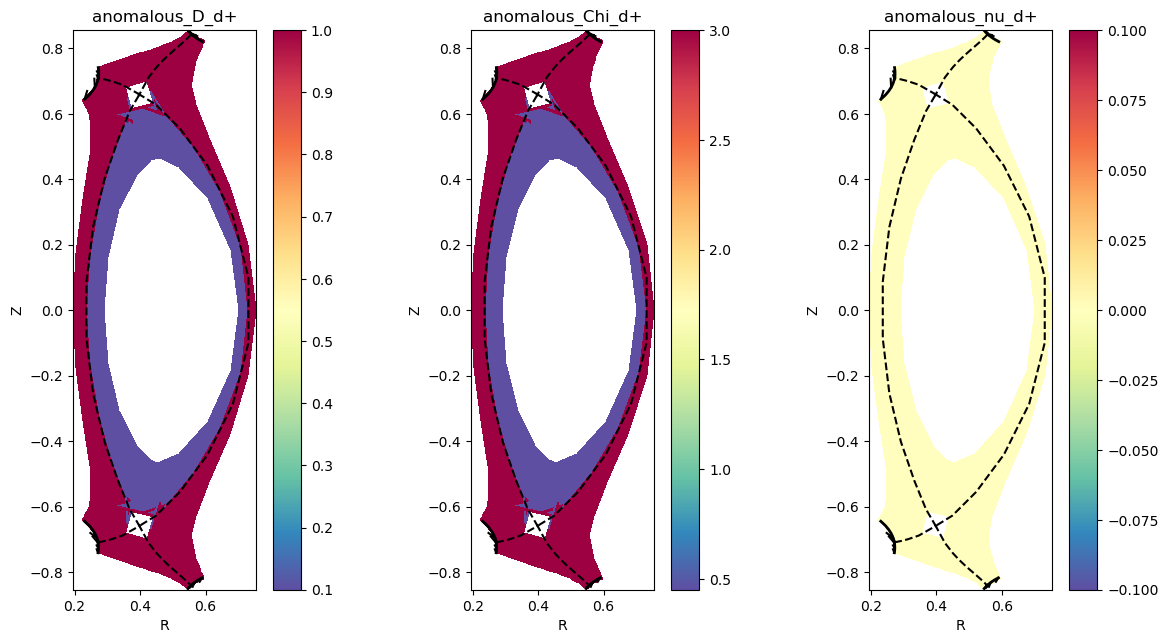

In [14]:
data = caseng.ds

cols = 3
fig, axes = plt.subplots(1,cols, figsize = (cols*4,6), dpi = 100)
# fig.subplots_adjust(wspace = 0)
fig.tight_layout(pad = 0.4)
tind = 0

x = "d+"

data[f"anomalous_D_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = False)
data[f"anomalous_Chi_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False)
data[f"anomalous_nu_{x}"].isel(t=tind).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = False)

# [ax.set_ylim(-0.9,0) for ax in axes]
print("")

>>> Field D_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field D_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field D_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_e already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_e to /ssd_scratch/hcases/g3a4-source-newtest.nc
>>> Field chi_d+ already exists in /ssd_scratch/hcases/g3a4-source-newtest.nc, it will be overwritten
-> Wrote field chi_d+ to /ssd_scratch/hcases/g3a4-source-newtest.nc


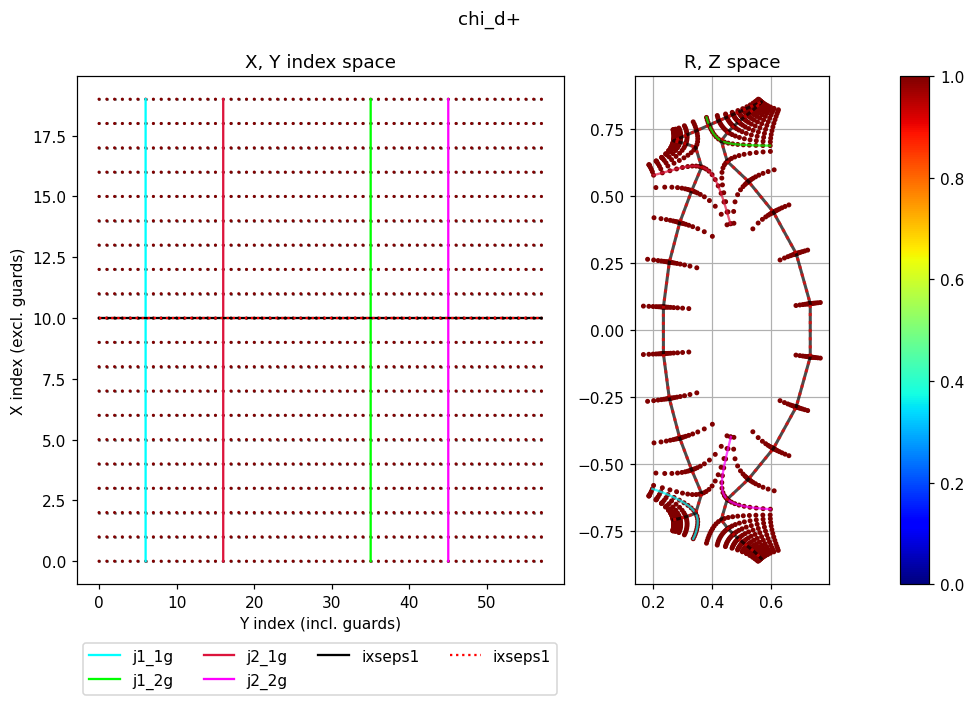

In [4]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")

D_e = Field("D_e", mesh)
D_e.data[mesh.slices("all")] = 1
D_e.data[mesh.slices("core")] = 0.5

D_i = Field("D_d+", mesh)
D_i.data[mesh.slices("all")] = 1
D_i.data[mesh.slices("core")] = 0.5

Chi_e = Field("chi_e", mesh)
Chi_e.data[mesh.slices("all")] = 1
Chi_e.data[mesh.slices("core")] = 1

Chi_i = Field("chi_d+", mesh)
Chi_i.data[mesh.slices("all")] = 1
Chi_i.data[mesh.slices("core")] = 1
# D.data[mesh.slices("outer_core")] = 0.5

Chi_i.plot()

mesh.write_field(D_e, dtype = "Field2D")
mesh.write_field(D_i, dtype = "Field2D")
mesh.write_field(Chi_e, dtype = "Field2D")
mesh.write_field(Chi_i, dtype = "Field2D")

In [4]:
mesh = Mesh(r"/ssd_scratch/hcases/g3a4-source-newtest.nc")